Using Cook County's (in Illinois) sentencing dataset that reports the sentence given to defendants convicted of different crimes.

# Load packages and imports

In [26]:
## basic functionality
import pandas as pd
import numpy as np
import re

## plotting
## note: you likely need to install this using
## pip or conda; you can delete this line
## if you're using matplotlib, seaborn, or other
## plotting pkg
import matplotlib.pyplot as plt 

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## datetime util
from dateutil.relativedelta import relativedelta

## import OS for CSV 
import os

## Suppress the traceback
%xmode Minimal

Exception reporting mode: Minimal


# Loading and exploring data

In [27]:
#Check path
os.getcwd()

#Load data
sentdf = pd.read_csv("pset2_inputdata/sentencing_asof0405.csv")

'/Users/maggiesullivan/Documents/DS_1/PS/PS2'

/var/folders/5_/9k6tj5157bx2n0nwswpfzhhw0000gn/T/ipykernel_34185/365230766.py:5: DtypeWarning: Columns (10,11,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  sentdf = pd.read_csv("pset2_inputdata/sentencing_asof0405.csv")


In [8]:
sentdf.head()

sentdf.shape
#result is (248146, 41)

sentdf.info()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510112469,116304211997,FIRST DEGREE MURDER,2,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
1,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510213021,98265074680,HOME INVASION,14,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
2,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516447217,131972895911,FIRST DEGREE MURDER,4,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
3,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516497493,131966356472,FIRST DEGREE MURDER,5,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
4,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516648320,98059642859,HOME INVASION,13,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide


(248146, 41)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248146 entries, 0 to 248145
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   CASE_ID                            248146 non-null  int64  
 1   CASE_PARTICIPANT_ID                248146 non-null  int64  
 2   RECEIVED_DATE                      248146 non-null  object 
 3   OFFENSE_CATEGORY                   248146 non-null  object 
 4   PRIMARY_CHARGE_FLAG                248146 non-null  bool   
 5   CHARGE_ID                          248146 non-null  int64  
 6   CHARGE_VERSION_ID                  248146 non-null  int64  
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  248146 non-null  object 
 8   CHARGE_COUNT                       248146 non-null  int64  
 9   DISPOSITION_DATE                   248146 non-null  object 
 10  DISPOSITION_CHARGED_CHAPTER        248146 non-null  object 
 11  DISPOSITION_CHARGED_ACT            2427

# Data cleaning/interpretation

In [9]:
print(sentdf[["CASE_ID","CASE_PARTICIPANT_ID","CHARGE_ID"]].apply("nunique", axis=0))

CASE_ID                197519
CASE_PARTICIPANT_ID    211977
CHARGE_ID              229015
dtype: int64


In [10]:
#Example of a case with multiple participants
pers_per_case = sentdf.groupby("CASE_ID").agg({"CASE_PARTICIPANT_ID":"nunique"}).sort_values("CASE_PARTICIPANT_ID", ascending=False)
pers_per_case.head(1)

#Example of a participant with multiple charges. 
charg_per_pers = sentdf.groupby("CASE_PARTICIPANT_ID").agg({"CHARGE_ID":"nunique"}).sort_values("CHARGE_ID", ascending=False)
charg_per_pers.head(1)

,CASE_PARTICIPANT_ID
CASE_ID,
388821827872,17


,CHARGE_ID
CASE_PARTICIPANT_ID,
179640159105,99



<b>Thoughts:</b>
<ul>
    <li><b>Why there are more unique people than unique cases?</b> There are more unique people than unique cases because cases may involve multiple people (participants).</li> 
    <li><b>Why there are more unique charges than unique people?</b> There are more unique charges than unique people because people may hve been charged with multiple things.</li> 
    </ul>

</FONT>

In [11]:
# mean and median number of charges per CASE_PARTICIPANT_ID
charg_per_pers.apply(["mean","median"])

# mean and median number of participants per CASE_IDx
pers_per_case.apply(["mean","median"])

,CHARGE_ID
mean,1.126146
median,1.000000


,CASE_PARTICIPANT_ID
mean,1.073198
median,1.000000


<FONT COLOR=BLue> 
    
<b>Thoughts:</b> 
    
In the data, a case may have multiple participants and a particpant may have multiple charges, but a Participant ID is unique to a case. So if a single participant is involved in multiple cases, they will receive multiple participant IDs. 
    
</FONT>

In [12]:
sentdf[sentdf["CASE_ID"] == 383100369857]
sentdf[sentdf["CASE_ID"] == 181880245351]
sentdf[sentdf["CASE_PARTICIPANT_ID"] == 209328243259]
sentdf[sentdf["CASE_PARTICIPANT_ID"] == 703110677522]
sentdf[sentdf["CASE_PARTICIPANT_ID"] == 142119935848]

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
26069,383100369857,711972606267,1/24/2011 12:00:00 AM,Theft,False,342081465055,636039059319,FINANCIAL INSTITUTION LOAN FRAUD,27,2/19/2013 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Theft by Deception
26070,383100369857,711972700639,1/24/2011 12:00:00 AM,Theft,False,342080710918,636037658010,THEFT,8,10/19/2012 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/10/2011 12:00:00 AM,Theft by Deception
26071,383100369857,711972700639,1/24/2011 12:00:00 AM,Theft,False,342080710918,636037658010,THEFT,8,10/19/2012 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/10/2011 12:00:00 AM,Theft by Deception
26072,383100369857,711972700639,1/24/2011 12:00:00 AM,Theft,False,342080912021,636038031692,THEFT,9,10/19/2012 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/10/2011 12:00:00 AM,Theft by Deception
26073,383100369857,711972700639,1/24/2011 12:00:00 AM,Theft,False,342080912021,636038031692,THEFT,9,10/19/2012 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/10/2011 12:00:00 AM,Theft by Deception
26074,383100369857,711972700639,1/24/2011 12:00:00 AM,Theft,False,342081263952,636038685636,FINANCIAL INSTITUTION LOAN FRAUD,26,10/19/2012 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/10/2011 12:00:00 AM,Theft by Deception
26075,383100369857,711972700639,1/24/2011 12:00:00 AM,Theft,False,342081263952,636038685636,FINANCIAL INSTITUTION LOAN FRAUD,26,10/19/2012 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/10/2011 12:00:00 AM,Theft by Deception
26076,383100369857,711972700639,1/24/2011 12:00:00 AM,Theft,False,342081314227,636038779057,THEFT,10,10/19/2012 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/10/2011 12:00:00 AM,Theft by Deception
26077,383100369857,711972700639,1/24/2011 12:00:00 AM,Theft,False,342081314227,636038779057,THEFT,10,10/19/2012 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/10/2011 12:00:00 AM,Theft by Deception
26078,383100369857,711972700639,1/24/2011 12:00:00 AM,Theft,False,342081364503,636038872477,THEFT,11,10/19/2012 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/10/2011 12:00:00 AM,Theft by Deception


,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
266,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69240855975,346314890356,MURDER/OTHER FORCIBLE FELONY,2,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion
267,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69240906251,346314329833,MURDER/OTHER FORCIBLE FELONY,3,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion
268,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69240956527,346312741683,MURDER/OTHER FORCIBLE FELONY,4,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion
269,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69241006802,346312835104,MURDER/OTHER FORCIBLE FELONY,5,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion
270,181880245351,179640159105,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69241057078,346312928524,MURDER/OTHER FORCIBLE FELONY,6,4/16/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,7/20/2004 10:00:00 PM,08/24/2004 12:00:00 AM,Charge(S) Approved,9/9/2004 12:00:00 AM,PROMIS Conversion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,181880245351,180263204488,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69450455690,276034039183,MURDER/STRONG PROB KILL/INJURE,29,4/5/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,8/24/2004 5:30:00 AM,08/24/2004 12:00:00 AM,Charge(S) Approved,NaN,PROMIS Conversion
386,181880245351,180263204488,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69450505966,276034132603,MURDER/STRONG PROB KILL/INJURE,31,4/5/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,8/24/2004 5:30:00 AM,08/24/2004 12:00:00 AM,Charge(S) Approved,NaN,PROMIS Conversion
387,181880245351,180263204488,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69450556241,276033291818,MURDER/STRONG PROB KILL/INJURE,33,4/5/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,8/24/2004 5:30:00 AM,08/24/2004 12:00:00 AM,Charge(S) Approved,NaN,PROMIS Conversion
388,181880245351,180263204488,8/24/2004 12:00:00 AM,PROMIS Conversion,False,69465840078,346317879814,MURDER/OTHER FORCIBLE FELONY,23,4/5/2012 12:00:00 AM,...,NaN,7/6/2004 12:00:00 AM,7/7/2004 12:00:00 AM,ROBBINS POLICE DEPARTMENT,NaN,8/24/2004 5:30:00 AM,08/24/2004 12:00:00 AM,Charge(S) Approved,NaN,PROMIS Conversion


,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
5509,228943496310,209328243259,7/21/2008 12:00:00 AM,PROMIS Conversion,False,105344243421,333375301392,AGG CRIM SEX ASLT/THREAT LIFE,2,8/4/2011 12:00:00 AM,...,NaN,7/20/2008 12:00:00 AM,NaN,C P D AREA 1,NaN,7/20/2008 8:05:00 PM,07/21/2008 12:00:00 AM,Sf,NaN,PROMIS Conversion
5510,228943496310,209328243259,7/21/2008 12:00:00 AM,PROMIS Conversion,False,105344293697,334747462643,AGG CRIM SEX ASLT/FELONY,3,8/4/2011 12:00:00 AM,...,NaN,7/20/2008 12:00:00 AM,NaN,C P D AREA 1,NaN,7/20/2008 8:05:00 PM,07/21/2008 12:00:00 AM,Sf,NaN,PROMIS Conversion
5511,228943496310,209328243259,7/21/2008 12:00:00 AM,PROMIS Conversion,False,105344343973,334747182381,AGG CRIM SEX ASLT/FELONY,4,8/4/2011 12:00:00 AM,...,NaN,7/20/2008 12:00:00 AM,NaN,C P D AREA 1,NaN,7/20/2008 8:05:00 PM,07/21/2008 12:00:00 AM,Sf,NaN,PROMIS Conversion
5512,228943496310,209328243259,7/21/2008 12:00:00 AM,PROMIS Conversion,False,105344394249,334747275802,AGG CRIM SEX ASLT/FELONY,5,8/4/2011 12:00:00 AM,...,NaN,7/20/2008 12:00:00 AM,NaN,C P D AREA 1,NaN,7/20/2008 8:05:00 PM,07/21/2008 12:00:00 AM,Sf,NaN,PROMIS Conversion
5513,228943496310,209328243259,7/21/2008 12:00:00 AM,PROMIS Conversion,False,105344444525,334747369223,AGG CRIM SEX ASLT/FELONY,6,8/4/2011 12:00:00 AM,...,NaN,7/20/2008 12:00:00 AM,NaN,C P D AREA 1,NaN,7/20/2008 8:05:00 PM,07/21/2008 12:00:00 AM,Sf,NaN,PROMIS Conversion
5514,228943496310,209328243259,7/21/2008 12:00:00 AM,PROMIS Conversion,False,105344494800,330669094481,AGG KID/INFLICT HARM,7,8/4/2011 12:00:00 AM,...,NaN,7/20/2008 12:00:00 AM,NaN,C P D AREA 1,NaN,7/20/2008 8:05:00 PM,07/21/2008 12:00:00 AM,Sf,NaN,PROMIS Conversion
5515,228943496310,209328243259,7/21/2008 12:00:00 AM,PROMIS Conversion,False,105344494800,330669094481,AGG KID/INFLICT HARM,7,8/4/2011 12:00:00 AM,...,NaN,7/20/2008 12:00:00 AM,NaN,C P D AREA 1,NaN,7/20/2008 8:05:00 PM,07/21/2008 12:00:00 AM,Sf,NaN,PROMIS Conversion
5516,228943496310,209328243259,7/21/2008 12:00:00 AM,PROMIS Conversion,False,105344545076,330669187901,AGG KID/INFLICT HARM,8,8/4/2011 12:00:00 AM,...,NaN,7/20/2008 12:00:00 AM,NaN,C P D AREA 1,NaN,7/20/2008 8:05:00 PM,07/21/2008 12:00:00 AM,Sf,NaN,PROMIS Conversion
5517,228943496310,209328243259,7/21/2008 12:00:00 AM,PROMIS Conversion,False,105344545076,330669187901,AGG KID/INFLICT HARM,8,8/4/2011 12:00:00 AM,...,NaN,7/20/2008 12:00:00 AM,NaN,C P D AREA 1,NaN,7/20/2008 8:05:00 PM,07/21/2008 12:00:00 AM,Sf,NaN,PROMIS Conversion
5518,228943496310,209328243259,7/21/2008 12:00:00 AM,PROMIS Conversion,False,105344595352,330669001060,AGG KID/INFLICT HARM,9,8/4/2011 12:00:00 AM,...,NaN,7/20/2008 12:00:00 AM,NaN,C P D AREA 1,NaN,7/20/2008 8:05:00 PM,07/21/2008 12:00:00 AM,Sf,NaN,PROMIS Conversion


,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
15919,380066792901,703110677522,8/19/2010 12:00:00 AM,Narcotics,False,338837068609,629910203187,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,2,5/2/2017 12:00:00 AM,...,Broadview,8/19/2010 12:00:00 AM,NaN,BROADVIEW PD,NaN,8/19/2010 5:24:00 AM,08/19/2010 12:00:00 AM,Approved,10/14/2010 12:00:00 AM,Narcotics
15920,380066792901,703110677522,8/19/2010 12:00:00 AM,Narcotics,False,338837068609,629910203187,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,2,5/2/2017 12:00:00 AM,...,Broadview,8/19/2010 12:00:00 AM,NaN,BROADVIEW PD,NaN,8/19/2010 5:24:00 AM,08/19/2010 12:00:00 AM,Approved,10/14/2010 12:00:00 AM,Narcotics
15921,380066792901,703110677522,8/19/2010 12:00:00 AM,Narcotics,False,338837169160,629910390028,[POSSESSION OF CANNABIS WITH INTENT TO DELIVER...,5,5/2/2017 12:00:00 AM,...,Broadview,8/19/2010 12:00:00 AM,NaN,BROADVIEW PD,NaN,8/19/2010 5:24:00 AM,08/19/2010 12:00:00 AM,Approved,10/14/2010 12:00:00 AM,Narcotics
15922,380066792901,703110677522,8/19/2010 12:00:00 AM,Narcotics,False,338837319988,629910670289,POSSESSION OF A CONTROLLED SUBSTANCE,4,5/2/2017 12:00:00 AM,...,Broadview,8/19/2010 12:00:00 AM,NaN,BROADVIEW PD,NaN,8/19/2010 5:24:00 AM,08/19/2010 12:00:00 AM,Approved,10/14/2010 12:00:00 AM,Narcotics
15923,380066792901,703110677522,8/19/2010 12:00:00 AM,Narcotics,False,338837319988,629910670289,POSSESSION OF A CONTROLLED SUBSTANCE,4,5/2/2017 12:00:00 AM,...,Broadview,8/19/2010 12:00:00 AM,NaN,BROADVIEW PD,NaN,8/19/2010 5:24:00 AM,08/19/2010 12:00:00 AM,Approved,10/14/2010 12:00:00 AM,Narcotics
15924,380066792901,703110677522,8/19/2010 12:00:00 AM,Narcotics,False,338837420539,629910857130,POSSESSION OF CANNABIS,6,5/2/2017 12:00:00 AM,...,Broadview,8/19/2010 12:00:00 AM,NaN,BROADVIEW PD,NaN,8/19/2010 5:24:00 AM,08/19/2010 12:00:00 AM,Approved,10/14/2010 12:00:00 AM,Narcotics
15925,380066792901,703110677522,8/19/2010 12:00:00 AM,Narcotics,True,338836817230,629909736084,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,1,5/2/2017 12:00:00 AM,...,Broadview,8/19/2010 12:00:00 AM,NaN,BROADVIEW PD,NaN,8/19/2010 5:24:00 AM,08/19/2010 12:00:00 AM,Approved,10/14/2010 12:00:00 AM,Narcotics


,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
115,166860536934,142119935848,1/20/2002 12:00:00 AM,PROMIS Conversion,False,63758081382,752446781302,2ND DEGREE MURDER,2,6/10/2016 12:00:00 AM,...,NaN,1/16/2002 12:00:00 AM,NaN,CPD PUB HOUSING SO.,NaN,1/17/2002 2:20:00 PM,NaN,NaN,NaN,Homicide
116,166860536934,142119935848,1/20/2002 12:00:00 AM,PROMIS Conversion,False,63758232210,752446874722,ARMED ROBBERY,10,6/10/2016 12:00:00 AM,...,NaN,1/16/2002 12:00:00 AM,NaN,CPD PUB HOUSING SO.,NaN,1/17/2002 2:20:00 PM,NaN,NaN,NaN,Homicide
117,166860536934,142119935848,1/20/2002 12:00:00 AM,PROMIS Conversion,True,63778694451,220034296279,MURDER/INTENT TO KILL/INJURE,1,6/10/2016 12:00:00 AM,...,NaN,1/16/2002 12:00:00 AM,NaN,CPD PUB HOUSING SO.,NaN,1/17/2002 2:20:00 PM,NaN,NaN,NaN,Homicide
118,166860536934,142119935848,1/20/2002 12:00:00 AM,PROMIS Conversion,True,63778694451,220034296279,MURDER/INTENT TO KILL/INJURE,1,6/10/2016 12:00:00 AM,...,NaN,1/16/2002 12:00:00 AM,NaN,CPD PUB HOUSING SO.,NaN,1/17/2002 2:20:00 PM,NaN,NaN,NaN,Homicide


## Which offense is final?

- Constructing an indicator `is_changed_offense` that's True for case-participant-charge observations (rows) where there's a difference between the `OFFENSE_CATEGORY` and the `UPDATED_OFFENSE_CATEGORY`. 

<FONT COLOR=Blue>

<b>Thoughts:</b>

<ul>
    <li>OFFENSE_CATEGORY is a broad umbrella category for the charge against a participant before more specific charges are applied. Meanwhile the UPDATED_OFFENSE_CATEGORY is the updated version of this category as the case evolves, reflecting the category of the primary charge against the participant. This may be different than the original category and charge perhaps because some new things are discovered against the person, or some deals were made.</li>
    <li>The Most commonly changed offenses are PROMIS Conversion, DUI, and Unlawful Use of Weapon. PROMIS Conversions appears to be an internal system for preparing pretrial motions. If we disregard PROMIS Conversions, we would have the same results if we ommitted the TRUE condition.</li>
    <li><b>What may be a reason for an example of a changed offense?</b> A DUI charge was changed to an aggravated DUI. This most likley changed once the true recklessness of driving was investigated such as going too fast, running traffic lights, endangering pedestrians, etc.</li>
    
 </FONT>

In [113]:
# Indicator
sentdf["is_changed_offense"] = (sentdf["OFFENSE_CATEGORY"] != sentdf["UPDATED_OFFENSE_CATEGORY"])

# Check
sentdf[["is_changed_offense","OFFENSE_CATEGORY","UPDATED_OFFENSE_CATEGORY"]]

# More common changed offenses
# Code to support narrative response in the second bullet above. 
common_changed_offense = (sentdf[sentdf["is_changed_offense"]==True].groupby("OFFENSE_CATEGORY").agg(
    counts_of_offense = ("is_changed_offense",sum))).sort_values(by=["counts_of_offense"], ascending = False).reset_index()

# Disregarding PROMIS Conversions
# We would have the same results if we ommitted the TRUE condition 
common_changed_offense.head(4)

# Example of changed offense
# Picking the most common (apart from PROMIS)
sentdf[sentdf["OFFENSE_CATEGORY"] == common_changed_offense["OFFENSE_CATEGORY"][1]].head(1)


,is_changed_offense,OFFENSE_CATEGORY,UPDATED_OFFENSE_CATEGORY
0,True,PROMIS Conversion,Homicide
1,True,PROMIS Conversion,Homicide
2,True,PROMIS Conversion,Homicide
3,True,PROMIS Conversion,Homicide
4,True,PROMIS Conversion,Homicide
...,...,...,...
248141,True,Home Invasion,UUW - Unlawful Use of Weapon
248142,False,Domestic Battery,Domestic Battery
248143,False,Driving With Suspended Or Revoked License,Driving With Suspended Or Revoked License
248144,False,Driving With Suspended Or Revoked License,Driving With Suspended Or Revoked License


,OFFENSE_CATEGORY,counts_of_offense
0,PROMIS Conversion,6394
1,DUI,3896
2,UUW - Unlawful Use of Weapon,2155
3,Other Offense,2125


,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,is_black_derived,is_hispanic_derived,is_white_derived,is_other_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived,is_changed_offense
11021,377427814448,695176993911,4/22/2010 12:00:00 AM,DUI,True,335034309383,622701031647,AGGRAVATED DRIVING UNDER THE INFLUENCE OF ALCOHOL,1,2/1/2011 12:00:00 AM,...,False,False,True,False,True,False,2011-02-01,2011-02-01,judge_314,True


## Simplifying the charges

Using the field (`UPDATED_OFFENSE_CATEGORY`), creating a new field, `simplified_offense_derived`, that simplifies the many offense categories into broader buckets using the following process:

First, we create a new variable that strips "Aggravated" from the UPDATED_OFFENSE_CATEGORY (e.g., Aggravated Battery and Battery just becomes Battery)

In [19]:
### first, strip aggravated
sentdf["simplified_offense_derived"] = sentdf.UPDATED_OFFENSE_CATEGORY.str.replace("Aggravated ","")

### check 
sentdf[sentdf.UPDATED_OFFENSE_CATEGORY.str.contains('Aggravated')] 

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,is_changed_offense,no_aggrav,simplified_offense_derived
490,187012669278,179158955167,6/17/2004 12:00:00 AM,PROMIS Conversion,True,77331736779,646900134144,FLEEING/ATTEMPT ELUDE OFFICER,1,8/9/2011 12:00:00 AM,...,PROMIS Data Conversion,NaN,6/17/2004 4:00:00 PM,06/17/2004 12:00:00 AM,Charge(S) Approved,NaN,Aggravated Fleeing and Eluding,True,Fleeing and Eluding,Fleeing and Eluding
564,190325416965,197387987139,4/20/2006 12:00:00 AM,PROMIS Conversion,True,92009850447,160818176761,AGG DUI LIC SUSPENDED OR REVOKED,1,2/27/2014 12:00:00 AM,...,C P D AREA 5 DIST 16,NaN,4/20/2006 12:00:00 AM,04/20/2006 12:00:00 AM,Sf,NaN,Aggravated DUI,True,DUI,DUI
623,193291147063,198724392116,5/28/2006 12:00:00 AM,PROMIS Conversion,True,94059141397,160806966293,AGG DUI LIC SUSPENDED OR REVOKED,1,5/22/2015 12:00:00 AM,...,C P D AREA 3 DIST 19,NaN,5/28/2006 10:05:00 PM,05/28/2006 12:00:00 AM,Sf,NaN,Aggravated DUI,True,DUI,DUI
710,197704570516,190518633402,7/24/2006 12:00:00 AM,PROMIS Conversion,True,84261749891,160548471591,AGG DUI LIC SUSPENDED OR REVOKED,1,2/9/2015 12:00:00 AM,...,C P D AREA 4 DIST 11,NaN,7/23/2006 10:05:00 PM,07/24/2006 12:00:00 AM,Sf,NaN,Aggravated DUI,True,DUI,DUI
720,199189711812,197340046053,3/3/2006 12:00:00 AM,PROMIS Conversion,True,252404109008,534452790150,AGG DUI/NO VALID DL,1,12/23/2011 12:00:00 AM,...,MT. PROSPECT POLICE DEPARTMENT,NaN,1/14/2006 9:00:00 AM,03/03/2006 12:00:00 AM,Charge(S) Approved,NaN,Aggravated DUI,True,DUI,DUI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248123,445002110568,903650885482,12/24/2020 12:00:00 AM,Aggravated Assault Police Officer,True,446950853762,838538128806,AGGRAVATED ASSAULT/PUBLIC PROP,1,3/30/2021 12:00:00 AM,...,HANOVER PARK PD,NaN,12/24/2020 2:51:00 PM,12/24/2020 12:00:00 AM,Approved,2/10/2021 12:00:00 AM,Aggravated Assault Police Officer,False,Assault Police Officer,Assault Police Officer
248132,445217840081,904336027784,1/12/2021 12:00:00 AM,Aggravated Battery Police Officer,False,447990908763,836576016690,DOMESTIC BATTERY,3,2/23/2021 12:00:00 AM,...,ELGIN PD,NaN,1/12/2021 3:12:00 AM,01/12/2021 12:00:00 AM,Approved,2/23/2021 12:00:00 AM,Aggravated Battery Police Officer,False,Battery Police Officer,Battery Police Officer
248133,445217840081,904336027784,1/12/2021 12:00:00 AM,Aggravated Battery Police Officer,True,447302935029,835272426134,AGGRAVATED BATTERY,1,2/23/2021 12:00:00 AM,...,ELGIN PD,NaN,1/12/2021 3:12:00 AM,01/12/2021 12:00:00 AM,Approved,2/23/2021 12:00:00 AM,Aggravated Battery Police Officer,False,Battery Police Officer,Battery Police Officer
248137,445412275667,904972002160,1/27/2021 12:00:00 AM,Aggravated Fleeing and Eluding,False,448033894552,836657479423,RESIST/PC OFF/CORR/FRFTR/INJ,3,3/5/2021 12:00:00 AM,...,NORRIDGE PD,NaN,1/27/2021 3:40:00 AM,01/27/2021 12:00:00 AM,Approved,3/4/2021 12:00:00 AM,Aggravated Fleeing and Eluding,False,Fleeing and Eluding,Fleeing and Eluding



Then:
- Combining all offenses with arson in the string into a single arson category (`Arson`)
- Combining all offenses with homicide in the string into a single homicide category (`Homicide`)
- Combining all offenses with vehicle/vehicular in the string into a single vehicle category (`Vehicle-related`)
- Combining all offenses with battery in the string into a single battery category (`Battery`)

In [20]:
offense_criteria = [sentdf.simplified_offense_derived.str.contains("Arson", case = False),
                    sentdf.simplified_offense_derived.str.contains("Homicide", case = False),
                   sentdf.simplified_offense_derived.str.contains("Vehicle-related", case = False),
                   sentdf.simplified_offense_derived.str.contains("Battery", case = False)]

offense_codeto = ["Arson", "Homicide", "Vehicle-related","Battery"]

sentdf["simplified_offense_derived"] = np.select(offense_criteria, offense_codeto, default = sentdf["simplified_offense_derived"])

sentdf[["UPDATED_OFFENSE_CATEGORY","simplified_offense_derived"]]

,UPDATED_OFFENSE_CATEGORY,simplified_offense_derived
0,Homicide,Homicide
1,Homicide,Homicide
2,Homicide,Homicide
3,Homicide,Homicide
4,Homicide,Homicide
...,...,...
248141,UUW - Unlawful Use of Weapon,UUW - Unlawful Use of Weapon
248142,Domestic Battery,Battery
248143,Driving With Suspended Or Revoked License,Driving With Suspended Or Revoked License
248144,Driving With Suspended Or Revoked License,Driving With Suspended Or Revoked License


In [21]:
# Unique values of updated offense category
print("Updated Offense Category: " + str(len(pd.unique(sentdf["UPDATED_OFFENSE_CATEGORY"]))))

# Unique values of simplified offense category
print("Updated Offense Category: " + str(len(pd.unique(sentdf["simplified_offense_derived"]))))

# 11 (14?) categories changed
sentdf[sentdf["UPDATED_OFFENSE_CATEGORY"] != sentdf["simplified_offense_derived"]].groupby(["UPDATED_OFFENSE_CATEGORY","simplified_offense_derived"]).size().reset_index()

Updated Offense Category: 79
Updated Offense Category: 68


,UPDATED_OFFENSE_CATEGORY,simplified_offense_derived,0
0,Aggravated Assault Police Officer,Assault Police Officer,359
1,Aggravated Battery,Battery,3664
2,Aggravated Battery Police Officer,Battery,7224
3,Aggravated Battery With A Firearm,Battery,4453
4,Aggravated DUI,DUI,19084
5,Aggravated Discharge Firearm,Discharge Firearm,594
6,Aggravated Fleeing and Eluding,Fleeing and Eluding,2354
7,Aggravated Identity Theft,Identity Theft,81
8,Aggravated Robbery,Robbery,1583
9,Arson and Attempt Arson,Arson,5


## Cleaning additional variables

Cleaning the following variables; 


- Race: create True/false indicators for `is_black_derived` (Black only or `White/Black [Hispanic or Latino]`), `is_hisp_derived` (Non-Black Hispanic, so either hispanic alone or white hispanic), `is_white_derived` (White non-hispanic), or `is_other_derived` (none of the above)


- Gender: create a boolean true/false indicator for `is_male_derived` (false is female, unknown, or other)


- Age at incident: you notice outliers like 130-year olds. Recode the top 0.01% of values to be equal to the 99.99th percentile value (this is sometimes called `winsorizing` but don't worry about the terminology). Call this `age_derived`


In [28]:
## RACE 

# Initial check
pd.unique(sentdf["RACE"])

# Race Derived Indicatior
sentdf["is_black_derived"] = sentdf["RACE"].str.contains("Black", na = False)
sentdf["is_hispanic_derived"] = sentdf["RACE"].str.contains("Hispanic", case = False, na = False) & ~sentdf["RACE"].str.contains("Black", case = False, na = False)
sentdf["is_white_derived"] = (sentdf["RACE"] == "White")
sentdf["is_other_derived"] = (sentdf["RACE"] != "White") & (sentdf["RACE"] != "Black") & (~sentdf["RACE"].str.contains("Hispanic", case = False , na = False))

# Check:
sentdf[["RACE","is_black_derived","is_hispanic_derived","is_white_derived","is_other_derived"]].groupby(["RACE","is_black_derived","is_hispanic_derived","is_white_derived","is_other_derived"]).size().reset_index()

## Gender INDICATORS ###

# Initial check
pd.unique(sentdf["GENDER"])

# Create new indicator
sentdf['is_male_derived'] = np.where(sentdf.GENDER.isin(["Male"]), True, False)

# Check:
sentdf[["GENDER","is_male_derived"]].groupby(["GENDER","is_male_derived"]).size().reset_index()

# Age Derived Indicators
sentdf["age_derived"] = np.where(sentdf["AGE_AT_INCIDENT"] > sentdf.AGE_AT_INCIDENT.quantile(0.9999), True, False)

# Check:
sentdf[["AGE_AT_INCIDENT","age_derived"]]

array(['Black', 'White [Hispanic or Latino]', 'White', 'HISPANIC', nan,
       'ASIAN', 'White/Black [Hispanic or Latino]', 'Asian',
       'American Indian', 'Unknown', 'Biracial'], dtype=object)

,RACE,is_black_derived,is_hispanic_derived,is_white_derived,is_other_derived,0
0,ASIAN,False,False,False,True,65
1,American Indian,False,False,False,True,125
2,Asian,False,False,False,True,1453
3,Biracial,False,False,False,True,35
4,Black,True,False,False,False,164423
5,HISPANIC,False,True,False,False,5941
6,Unknown,False,False,False,True,358
7,White,False,False,True,False,35361
8,White [Hispanic or Latino],False,True,False,False,37880
9,White/Black [Hispanic or Latino],True,False,False,False,1238


array(['Male', 'Female', nan, 'Male name, no gender given',
       'Unknown Gender', 'Unknown'], dtype=object)

,GENDER,is_male_derived,0
0,Female,False,29714
1,Male,True,217610
2,"Male name, no gender given",False,3
3,Unknown,False,7
4,Unknown Gender,False,3


,AGE_AT_INCIDENT,age_derived
0,27.0,False
1,27.0,False
2,27.0,False
3,27.0,False
4,27.0,False
...,...,...
248141,19.0,False
248142,32.0,False
248143,29.0,False
248144,29.0,False



- Creating `sentenceymd_derived` that's a version of `SENTENCING_DATE` converted to datetime format and a rounded version, `sentenceym_derived`, that's rounded down to the first of the month and the year (e.g., 01-05-2016 and 01-27-2016 each become 01-01-2016)

In [71]:
# Stripping timestamp
sentdf["sentenceymd_derived"] = sentdf.SENTENCE_DATE.str.replace(" 12:00:00 AM","")

# Checking years for disparities
np.sort(pd.unique(sentdf["sentenceymd_derived"].str[-4:]))

# Using given regex code for fixing dates:
sentdf['sentenceymd_derived'] = [re.sub(r'2[1-9]([0-9]+)', r"20\1", str(date)) 
                             if bool(re.search('\/2[1-9][0-9]+', str(date))) else 
                            str(date) 
                            for date in 
                            sentdf.SENTENCE_DATE]

# Stripping timestamp & converting type:
sentdf["sentenceymd_derived"] = pd.to_datetime(sentdf["sentenceymd_derived"], utc = False)

# Rounding each date to first of the month
sentdf["sentenceym_derived"] = sentdf["sentenceymd_derived"].astype("datetime64[M]")

## We used the default settings of date i.e. yymmdd - as understood from the naming convention given 

#Check for regularities
sentdf[['sentenceymd_derived',"sentenceym_derived","SENTENCE_DATE"]]

#Checking for type
sentdf.info()

array(['1930', '1973', '1982', '1983', '1985', '1986', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2025', '2026', '2029', '2041', '2048', '2051', '2106', '2108',
       '2109', '2112', '2113', '2119', '2201', '2212', '2216', '2217',
       '2218', '2219', '2912', '2914', '2915', '2916', '2917'],
      dtype=object)

,sentenceymd_derived,sentenceym_derived,SENTENCE_DATE
0,1986-06-02,1986-06-01,6/2/1986 12:00:00 AM
1,1986-06-02,1986-06-01,6/2/1986 12:00:00 AM
2,1986-06-02,1986-06-01,6/2/1986 12:00:00 AM
3,1986-06-02,1986-06-01,6/2/1986 12:00:00 AM
4,2014-10-16,2014-10-01,10/16/2014 12:00:00 AM
...,...,...,...
248141,2021-03-19,2021-03-01,3/19/2021 12:00:00 AM
248142,2021-03-23,2021-03-01,3/23/2021 12:00:00 AM
248143,2021-03-11,2021-03-01,3/11/2021 12:00:00 AM
248144,2021-03-11,2021-03-01,3/11/2021 12:00:00 AM


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248146 entries, 0 to 248145
Data columns (total 50 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   CASE_ID                            248146 non-null  int64         
 1   CASE_PARTICIPANT_ID                248146 non-null  int64         
 2   RECEIVED_DATE                      248146 non-null  object        
 3   OFFENSE_CATEGORY                   248146 non-null  object        
 4   PRIMARY_CHARGE_FLAG                248146 non-null  bool          
 5   CHARGE_ID                          248146 non-null  int64         
 6   CHARGE_VERSION_ID                  248146 non-null  int64         
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  248146 non-null  object        
 8   CHARGE_COUNT                       248146 non-null  int64         
 9   DISPOSITION_DATE                   248146 non-null  object        
 10  DISPOSITION_CHARGED_


- Sentencing judge: creating an identifier (`judgeid_derived`) for each unique judge (`SENTENCE_JUDGE`) structured as judge_1, judge_2.... When finding unique judges, there are various duplicates we could weed out --- for now, just focusing on (1) the different iterations of Doug/Douglas Simpson, (2) the different iterations of Shelley Sutker (who appears both with her maiden name and her hyphenated married name). 

In [32]:
print(len(pd.unique(sentdf["SENTENCE_JUDGE"]))) # 339

# Cleaning the 2 given names:
sentdf['judgeid_derived'] = sentdf.SENTENCE_JUDGE.str.replace("Douglas J Simpson","Doug  Simpson")
sentdf['judgeid_derived'] = sentdf.judgeid_derived.str.replace("Shelley  Sutker-Dermer","Shelley  Sutker")

# Checking; only 2 unique names should be removed
print(len(pd.unique(sentdf['judgeid_derived']))) # 337

# Grouping and giving id
sentdf['judgeid_derived'] = (sentdf.groupby(by="judgeid_derived", sort = True).ngroup() + 1).astype('str')

print(len(pd.unique(sentdf['judgeid_derived']))) # 337


# Creating final column
sentdf['judgeid_derived'] = "judge_" + sentdf['judgeid_derived'] 

# Check
#* sentdf[['judgeid_derived',"SENTENCE_JUDGE"]].groupby(['judgeid_derived',"SENTENCE_JUDGE"]).size().reset_index()
sentdf[["SENTENCE_JUDGE","judgeid_derived"]][sentdf['judgeid_derived']=="judge_111"]
sentdf[["SENTENCE_JUDGE","judgeid_derived"]][sentdf['SENTENCE_JUDGE']=="James D Egan"]
sentdf[["SENTENCE_JUDGE","judgeid_derived"]][sentdf['judgeid_derived']=="judge_651"] # Should be empty
sentdf[["SENTENCE_JUDGE","judgeid_derived"]][sentdf['judgeid_derived']=="judge_246"] 
sentdf[["SENTENCE_JUDGE","judgeid_derived"]][sentdf['SENTENCE_JUDGE']=="Paula M Daleo"]

339
337
337


,SENTENCE_JUDGE,judgeid_derived
702,James D Egan,judge_111


,SENTENCE_JUDGE,judgeid_derived
702,James D Egan,judge_111


,SENTENCE_JUDGE,judgeid_derived


,SENTENCE_JUDGE,judgeid_derived
761,Paula M Daleo,judge_246
762,Paula M Daleo,judge_246
763,Paula M Daleo,judge_246
765,Paula M Daleo,judge_246
766,Paula M Daleo,judge_246
...,...,...
246370,Paula M Daleo,judge_246
246636,Paula M Daleo,judge_246
246719,Paula M Daleo,judge_246
246767,Paula M Daleo,judge_246


,SENTENCE_JUDGE,judgeid_derived
761,Paula M Daleo,judge_246
762,Paula M Daleo,judge_246
763,Paula M Daleo,judge_246
765,Paula M Daleo,judge_246
766,Paula M Daleo,judge_246
...,...,...
246370,Paula M Daleo,judge_246
246636,Paula M Daleo,judge_246
246719,Paula M Daleo,judge_246
246767,Paula M Daleo,judge_246


In [34]:
sentdf[["SENTENCE_JUDGE","judgeid_derived"]].sample(n=10, random_state=1)

,SENTENCE_JUDGE,judgeid_derived
201854,Kristyna C Ryan,judge_172
201179,James B Linn,judge_110
242131,Charles P Burns,judge_37
176000,James Michael Obbish,judge_116
58727,Kenneth J Wadas,judge_164
164474,Raymond Myles,judge_256
203979,Michele M Pitman,judge_229
243337,Steven J Goebel,judge_288
180599,"Byrne, Thomas",judge_23
219587,James B Linn,judge_110


## Subsetting rows to analytic dataset

- Subsetting to cases where only one participant is charged, since cases with >1 participant might have complications like 
plea bargains/informing from other participants affecting the sentencing of the focal participant

- To go from a participant-case level dataset, where each participant is repeated across charges tied to the case, to a participant-level dataset, where each participant has one charge, subset to a participant's primary charge and their current sentence (`PRIMARY_CHARGE_FLAG` is True and `CURRENT_SENTENCE_FLAG` is True). 

- Filtering out observations where judge is nan or nonsensical (indicated by is.null or equal to FLOOD)

- Subsetting to sentencing date between 01-01-2012 and 04-05-2021 (inclusive)

In [75]:
## create a new DF by filtering case IDs and number of unique cases
people_per_case = sentdf.groupby("CASE_ID").agg({"CASE_PARTICIPANT_ID":"nunique"}).reset_index()
people_per_case.head()

##create a new df by filtering where the people_per_case df = 1 case participant
one_pers = people_per_case.CASE_ID[people_per_case.CASE_PARTICIPANT_ID == 1]
print(one_pers)

#subset original df to where one person is in the case ID. Create a copy
subset_1pers = sentdf[sentdf.CASE_ID.isin(one_pers)].copy()

#subset to participant's primary charge and their current sentance 
subset_charge_sent = subset_1pers[(subset_1pers.PRIMARY_CHARGE_FLAG == True) & (subset_1pers.CURRENT_SENTENCE_FLAG == True)]

#double check this worked by confirming there are no longer multiple charges for the same case-part
sentdf.shape
subset_1pers.shape
subset_charge_sent.shape
subset_charge_sent.head()

#filter out observations where judge is nan or nonsensical
subset_judge_clean = subset_charge_sent[(~subset_charge_sent.SENTENCE_JUDGE.isnull())&(subset_charge_sent.SENTENCE_JUDGE != "FLOOD")].copy()

#Subsetting to sentencing date between 01-01-2012 and 04-05-2021 (inclusive)

final_date_sentdf = subset_judge_clean[(subset_judge_clean.sentenceymd_derived >= "01-01-2012")&(subset_judge_clean.sentenceymd_derived <= "04-05-2021")]

,CASE_ID,CASE_PARTICIPANT_ID
0,149765331439,1
1,150065796098,1
2,154524891354,1
3,154954734978,1
4,155222744754,1


0         149765331439
1         150065796098
2         154524891354
3         154954734978
4         155222744754
              ...     
197514    445516248775
197515    445527409730
197516    445587767000
197517    445592613204
197518    445593200623
Name: CASE_ID, Length: 185231, dtype: int64


(248146, 50)

(216252, 50)

(152900, 50)

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,UPDATED_OFFENSE_CATEGORY,is_black_derived,is_hispanic_derived,is_white_derived,is_other_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived
9,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,False,2014-10-16,2014-10-01,judge_41
16,150065796098,162105612284,8/23/1984 12:00:00 AM,PROMIS Conversion,True,50792360681,113332130159,FIRST DEGREE MURDER,1,8/6/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,False,2014-08-06,2014-08-01,judge_311
18,154954734978,225758446387,6/8/2001 12:00:00 AM,PROMIS Conversion,True,54885211141,174293345821,VIO BAIL BOND/CLASS 1,1,12/2/2013 12:00:00 AM,...,PROMIS Conversion,False,True,False,False,True,False,2013-12-02,2013-12-01,judge_163
19,155222744754,217349881776,1/31/2001 12:00:00 AM,PROMIS Conversion,True,53899906462,280120721775,POSS AMT CON SUB EXCEPT (A)/(D),1,9/10/2012 12:00:00 AM,...,Narcotics,True,False,False,False,False,False,2012-09-10,2012-09-01,judge_332
26,155327892699,217212381455,2/6/2001 12:00:00 AM,PROMIS Conversion,True,53938518259,164877860811,DUI LIC SUSPENDED OR REVOKED (EFFECTIVE 4-13-2...,1,9/19/2014 12:00:00 AM,...,PROMIS Conversion,False,False,True,False,True,False,2014-09-19,2014-09-01,judge_315


# Investigating Black vs. White sentencing disparities 

Now that the data are cleaned, we're going to investigate different types of disparities in sentencing between Black defendants and White defendants. We're focusing on these groups for the purpose of the problem set, but the analysis could be extended to study Hispanic defendants or, in a different jurisdiction, Asian and other minoritized groups.

**One major caveat**: when comparing whether two similar defendants received different sentences, we're missing one important attribute that influences sentencing: the defendant's criminal history. This influences sentencing both through sentencing guidelines, which can prescribe longer sentences for those who have certain types of prior convictions, and through judicial discretion if judges are more lenient with first-time defendants. The above sources discuss how much we want to "control away" for this prior history, since if we think there are racial biases in which defendants, conditional on *committing* a crime, are arrested and charged, we may not want to adjust for that factor.


## Investigating one type of between-group difference: who reaches the sentencing stage? 

Calculating the fraction of Black versus White defendants by month and year

- Denominator is number of unique cases that month
- Numerator for black defendants is count of is_black_derived
- Numerator for white defendants is count of is_white_derived
- Fraction of each is numerator/denominator

In [76]:
#Import data again
os.getcwd()

#Load data
sentencing2 = pd.read_csv("pset2_inputdata/sentencing_cleaned.csv")

#* 
sentencing2.info()

# Extracting month
# sentencing2["sentenceym_derived"].sample(n=10, random_state=1)
#* sentencing2["sentence_year"] = sentencing2["sentenceym_derived"].astype(str).str[:4]
#* sentencing2["sentence_month"] = sentencing2["sentenceym_derived"].astype(str).str[5:7]
# sentencing2[["sentenceym_derived","sentence_year","sentence_month"]].sample(n=10, random_state=1)

# Fractions of BvW by Month, Year (or should i create a new DF)
sentencing3 = sentencing2.groupby(["sentenceym_derived"]).agg(total_cases = ("CASE_ID", lambda x: len(pd.unique(x))),
                                                                        # sentence_time = (("sentence_year", "sentence_month"), lambda x,y: ','.join(x)),
                                                                         is_black = ("is_black_derived", "sum"),
                                                                         is_white = ("is_white_derived", "sum")).reset_index()

#sentencing3["sent_yymm"] = sentencing3['sentence_year'].astype(str) +"-"+ sentencing3["sentence_month"]
sentencing3["black_por"] = sentencing3["is_black"]/sentencing3["total_cases"]
sentencing3["white_por"] = sentencing3["is_white"]/sentencing3["total_cases"]

#max(sentencing3['sentence_month'])
#min(sentencing3['sentence_month'])

#max(sentencing3['sentence_year'])
#min(sentencing3['sentence_year'])

# sentencing3 = sentencing3[sentencing3['sentence_year'] == '2021']
sentencing3


'/Users/maggiesullivan/Documents/DS_1/PS/PS2'

/var/folders/5_/9k6tj5157bx2n0nwswpfzhhw0000gn/T/ipykernel_34185/1492611192.py:5: DtypeWarning: Columns (10,11,16,25) have mixed types. Specify dtype option on import or set low_memory=False.
  sentencing2 = pd.read_csv("pset2_inputdata/sentencing_cleaned.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135165 entries, 0 to 135164
Data columns (total 52 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   CASE_ID                            135165 non-null  int64  
 1   CASE_PARTICIPANT_ID                135165 non-null  int64  
 2   RECEIVED_DATE                      135165 non-null  object 
 3   OFFENSE_CATEGORY                   135165 non-null  object 
 4   PRIMARY_CHARGE_FLAG                135165 non-null  bool   
 5   CHARGE_ID                          135165 non-null  int64  
 6   CHARGE_VERSION_ID                  135165 non-null  int64  
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  135165 non-null  object 
 8   CHARGE_COUNT                       135165 non-null  int64  
 9   DISPOSITION_DATE                   135165 non-null  object 
 10  DISPOSITION_CHARGED_CHAPTER        135165 non-null  object 
 11  DISPOSITION_CHARGED_ACT            1342

,sentenceym_derived,total_cases,is_black,is_white,black_por,white_por
0,2012-01-01,1674,1134,242,0.677419,0.144564
1,2012-02-01,1450,941,233,0.648966,0.160690
2,2012-03-01,1612,1030,255,0.638958,0.158189
3,2012-04-01,1436,1000,211,0.696379,0.146936
4,2012-05-01,1545,1074,223,0.695146,0.144337
...,...,...,...,...,...,...
106,2020-11-01,491,298,76,0.606925,0.154786
107,2020-12-01,537,347,85,0.646182,0.158287
108,2021-01-01,447,278,50,0.621924,0.111857
109,2021-02-01,491,320,66,0.651731,0.134420


## Visualizing

Text(0.5, 0, 'Time (yymm)')

Text(0, 0.5, 'Proportion of cases')

Text(58, 0.35, 'New SA')

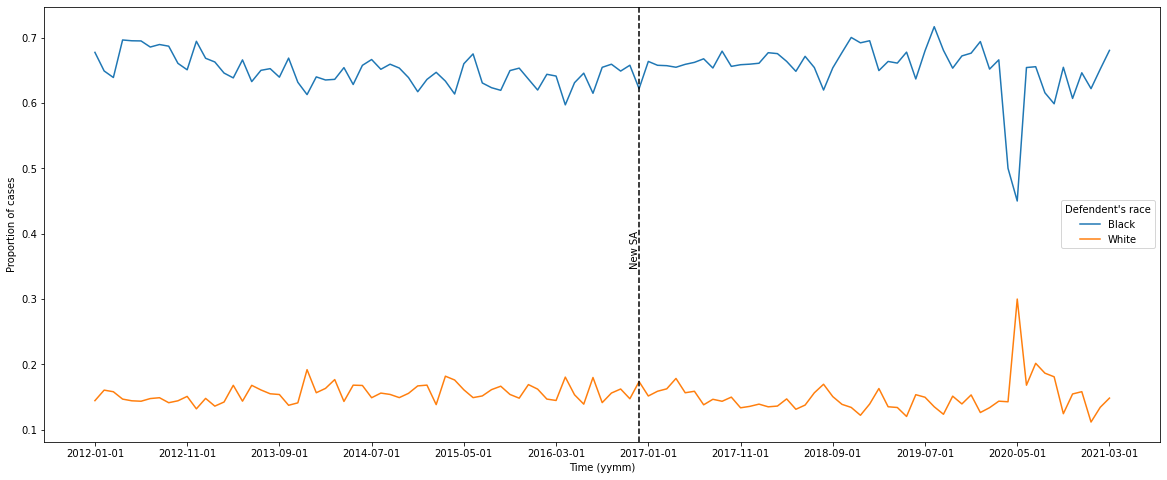

In [77]:
fig, ax = plt.subplots()
ax.plot(sentencing3["sentenceym_derived"], sentencing3["black_por"], label = "Black")
ax.plot(sentencing3["sentenceym_derived"], sentencing3["white_por"], label = "White")
ax.legend(title = "Defendent's race")
ax.set_xlabel("Time (yymm)")
ax.set_xticks(ax.get_xticks()[::10])
ax.set_ylabel("Proportion of cases")
plt.gcf().set_size_inches(20,8)
plt.axvline(x="2016-12-01", linestyle = '--', color = 'black')
plt.text(58,0.35,'New SA',rotation=90)
plt.show()

## Investigating the first type of disparity: probation versus incarceration (10 points)

One type of disparity beyond who arrives at the sentencing stage is whether the defendant receives probation or incarceration.

According to the codebook, incarceration is indicated by `COMMITMENT_TYPE` == "Illinois Department of Corrections"

Recreating the previous plot but where the y axis represents the difference between the following proportions (can be either Black - White or White - Black but make sure to label):

- Percent of black defendants who are incarcerated out of all black defendants that month/year 
- Percent of white defendants who are incarcerated out of all white defendants that month/year 

In [80]:
sentencing2["is_incarcerated_b"] = (sentencing2["COMMITMENT_TYPE"]=="Illinois Department of Corrections") & (sentencing2["is_black_derived"] == 1)
sentencing2["is_incarcerated_w"] = (sentencing2["COMMITMENT_TYPE"]=="Illinois Department of Corrections") & (sentencing2["is_white_derived"] == 1)
sentencing4 = sentencing2.groupby(["sentenceym_derived"]).agg(total_cases = ("CASE_ID", lambda x: len(pd.unique(x))),
                                                                        # sentence_time = (("sentence_year", "sentence_month"), lambda x,y: ','.join(x)),
                                                                         is_black = ("is_black_derived", "sum"),
                                                                         is_white = ("is_white_derived", "sum"),
                                                                         b_incarcerated = ("is_incarcerated_b", "sum"),
                                                                         w_incarcerated = ("is_incarcerated_w", "sum")).reset_index()

#sentencing3["sent_yymm"] = sentencing3['sentence_year'].astype(str) +"-"+ sentencing3["sentence_month"]
sentencing4["black_white"] = sentencing4["b_incarcerated"]/sentencing4["is_black"] - sentencing4["w_incarcerated"]/sentencing4["is_white"]
#sentencing4["white_por"] = sentencing4["is_white"]/sentencing4["total_cases"]
sentencing4

,sentenceym_derived,total_cases,is_black,is_white,b_incarcerated,w_incarcerated,black_white
0,2012-01-01,1674,1134,242,674,87,0.234852
1,2012-02-01,1450,941,233,566,87,0.228097
2,2012-03-01,1612,1030,255,602,113,0.141329
3,2012-04-01,1436,1000,211,598,94,0.152502
4,2012-05-01,1545,1074,223,579,73,0.211752
...,...,...,...,...,...,...,...
106,2020-11-01,491,298,76,122,23,0.106764
107,2020-12-01,537,347,85,170,32,0.113443
108,2021-01-01,447,278,50,138,22,0.056403
109,2021-02-01,491,320,66,136,13,0.228030


Text(0.5, 0, 'Time (yymm)')

Text(0, 0.5, '% Incarcerated among those Sentenced \n (Black - White)')

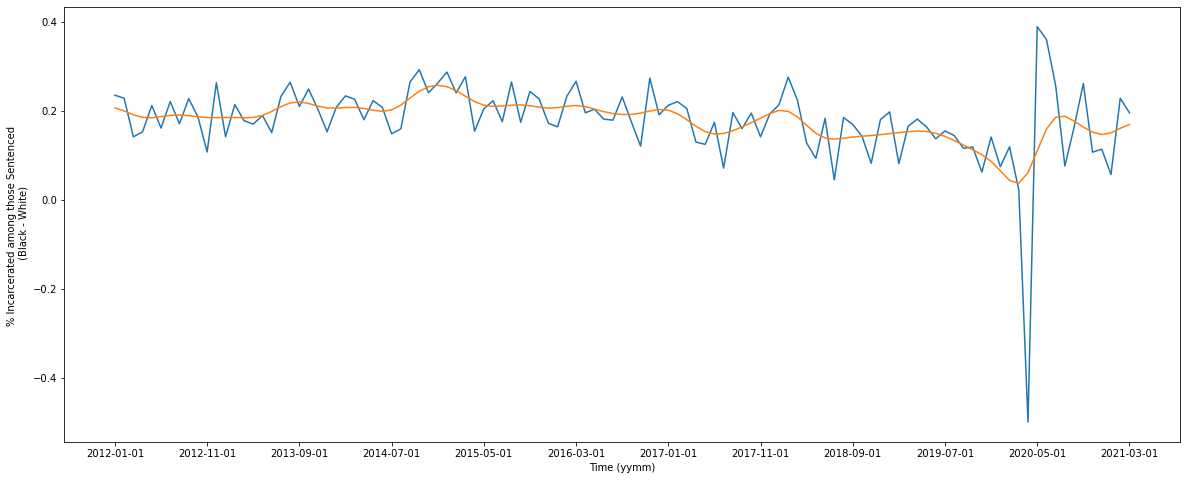

In [81]:
from scipy.ndimage.filters import gaussian_filter1d
from scipy.interpolate import make_interp_spline
from scipy import interpolate
fig, ax = plt.subplots()
ax.plot(sentencing4["sentenceym_derived"], sentencing4["black_white"])
ax.set_xlabel("Time (yymm)")
ax.set_ylabel("% Incarcerated among those Sentenced \n (Black - White)")
ysmoothed = gaussian_filter1d(sentencing4["black_white"], sigma=2)
plt.plot(sentencing4["sentenceym_derived"], ysmoothed)
plt.gcf().set_size_inches(20,8)
ax.set_xticks(ax.get_xticks()[::10])
plt.show()

In [109]:
#Demonstrates the drop in the number of total cases due to closures and COVID-19 mitigation measures.
sentencing4[97:103]

,sentenceym_derived,total_cases,is_black,is_white,b_incarcerated,w_incarcerated,black_white
97,2020-02-01,807,526,108,267,42,0.118716
98,2020-03-01,473,315,68,146,30,0.022316
99,2020-04-01,14,7,2,0,1,-0.500000
100,2020-05-01,20,9,6,5,1,0.388889
101,2020-06-01,107,70,18,33,2,0.360317
102,2020-07-01,238,156,48,79,12,0.256410


<FONT COLOR=BLUE>
    
<b>Thoughts:</b> The difference between the proportions of the percent of black defendants who are incarcerated out of all black defendants that month/year versus the percent of white defendants who are incarcerated out of all white defendants that month/year has a consistent trend line at 0.2% with a sharp dip just before May of 2020. This coincides with the onset of the COVID-19 pandemic and safety measures, which included court closures and overal fewer total cases (just 14 in April 2020 and 20 in May 2020). Once the government lifted the strictest safety measures, the trend resumed a similar pattern to before the start of the pandemic. 
    
   </FONT>

## Investigating incarceration rates by charge

Adjusting for the fact that prosecutors have discretion in what crimes to charge defendants with. 
If white defendants are charged with crimes that tend to receive probation rather than incarceration, that could explain some of the gaps.


First, we create a set of 'frequent offenses' that represent (over the entire period) the union of the 10 offenses Black defendant are most likely to be charged with and the 10 offenses white defendants are most likely to be charged with (might be far less than 20 total if there's a lot of overlap in common charges)

Using the `simplified_offense_derived` for this

In [82]:
bo = sentencing2[sentencing2["is_black_derived"] == 1]["simplified_offense_derived"].value_counts()[:10].index.tolist()
wo = sentencing2[sentencing2["is_white_derived"] == 1]["simplified_offense_derived"].value_counts()[:10].index.tolist()
frequent_offenses = sorted(list(set(bo) | set(wo)))
frequent_offenses

['Battery',
 'Burglary',
 'DUI',
 'Driving With Suspended Or Revoked License',
 'Narcotics',
 'Other Offense',
 'Residential Burglary',
 'Retail Theft',
 'Robbery',
 'Theft',
 'UUW - Unlawful Use of Weapon',
 'Vehicle-related']

### Looking at incarceration rates (again just whether incarcerated) by race and offense type for these top offenses

Printing a wide-format version of the resulting table (so each row is an offense type, one col is black incarceration rate for that offense type; another is the white incarceration rate) and interpret. 
What offenses show the largest disparities in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation?


In [83]:
sentencing5 = sentencing2[sentencing2["simplified_offense_derived"].isin(frequent_offenses)]
sentencing5["is_incarcerated_b"] = (sentencing5["COMMITMENT_TYPE"]=="Illinois Department of Corrections") & (sentencing5["is_black_derived"] == 1)
sentencing5["is_incarcerated_w"] = (sentencing5["COMMITMENT_TYPE"]=="Illinois Department of Corrections") & (sentencing5["is_white_derived"] == 1)

sentencing6 = sentencing5.groupby(["simplified_offense_derived"]).agg(total_cases = ("CASE_ID", lambda x: len(pd.unique(x))),
                                                                        # sentence_time = (("sentence_year", "sentence_month"), lambda x,y: ','.join(x)),
                                                                         is_black = ("is_black_derived", "sum"),
                                                                         is_white = ("is_white_derived", "sum"),
                                                                         b_incarcerated = ("is_incarcerated_b", "sum"),
                                                                         w_incarcerated = ("is_incarcerated_w", "sum")).reset_index()

sentencing6["Black"] = sentencing6["b_incarcerated"]/sentencing6["is_black"]
sentencing6["White"] = sentencing6["w_incarcerated"]/sentencing6["is_white"]
sentencing6["Diff"] = (sentencing6["b_incarcerated"]/sentencing6["is_black"]) - (sentencing6["w_incarcerated"]/sentencing6["is_white"])
sentencing6[["simplified_offense_derived", "Black", "White", "Diff"]].sort_values(by="Diff", ascending = False)


/var/folders/5_/9k6tj5157bx2n0nwswpfzhhw0000gn/T/ipykernel_34185/1752577198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentencing5["is_incarcerated_b"] = (sentencing5["COMMITMENT_TYPE"]=="Illinois Department of Corrections") & (sentencing5["is_black_derived"] == 1)
/var/folders/5_/9k6tj5157bx2n0nwswpfzhhw0000gn/T/ipykernel_34185/1752577198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentencing5["is_incarcerated_w"] = (sentencing5["COMMITMENT_TYPE"]=="Illinois Department of Corrections") & (

,simplified_offense_derived,Black,White,Diff
4,Narcotics,0.537876,0.242535,0.295341
0,Battery,0.509032,0.275552,0.233480
10,UUW - Unlawful Use of Weapon,0.696191,0.481973,0.214217
7,Retail Theft,0.595713,0.449582,0.146132
1,Burglary,0.661927,0.535763,0.126164
5,Other Offense,0.340580,0.230228,0.110351
3,Driving With Suspended Or Revoked License,0.582193,0.496552,0.085642
9,Theft,0.386961,0.318721,0.068240
6,Residential Burglary,0.717791,0.654114,0.063677
2,DUI,0.404997,0.341855,0.063143


### Examining whether this changes pre and post change to charging threshold for retail theft 

One important question is not only whether there are disparities by offense type but also whether these disparities are changing over time.

The SAO (State Attorney Office), for instance, announced in December of 2016 that they would no longer default to charging retail thefts of under \$1,000 as felonies. This change might have (1) decreased disparities or (2) increased disparities, depending on the correlation between race/ethnicity and magnitude of goods stolen: https://www.dnainfo.com/chicago/20161215/little-village/kim-foxx-raises-bar-for-retail-theft-felonies/. 

Focusing on `simplified_offense_derived` == "Retail theft." we create a user-defined function that allows us to efficiently: 

- Compare Black-White disparities before and after the change using a two-month bandwidth (so pre is October and November 2016; post is January and February 2017)

- Compare Black-White disparities before and after the change using a four-month bandwidth (so pre is August- November 2016; post is January - April 2017)

- Compare Black-White disparities using an eight-month bandwidth

- Compare Black-White disparities using a twelve-month bandwidth

**Note**: Dec. 2016 is always excluded as a transition month


In [84]:
def pre_post(offense):
  
    #Note: CSV needs to already be uploaded and named "sentencing2". 
    #This is is to avoid errors within function for CSV reading if it's another location 

   
    #Initializing empty result dataset
    df_final = pd.DataFrame({'sentenceym_derived': pd.Series(dtype='object'),
                             'simplified_offense_derived': pd.Series(dtype='object'),
                             'total_cases': pd.Series(dtype='object'),
                             'is_black': pd.Series(dtype='object'),
                             'is_white': pd.Series(dtype='object'),
                             'b_incarcerated': pd.Series(dtype='object'),
                            'w_incarcerated': pd.Series(dtype='object')})
    
    # For data optimization and efficiency purposes, I'm filtering everything at the start since we only need 2015-2017
    # Creating raw data
    sentencingX = sentencing2[sentencing2["sentenceym_derived"] >= '2015-11-01']
    sentencingX = sentencingX[sentencingX["sentenceym_derived"] <= '2017-12-01']
    sentencingX = sentencingX[sentencingX["simplified_offense_derived"] == str(offense)]
    sentencingX["is_incarcerated_b"] = (sentencingX["COMMITMENT_TYPE"]=="Illinois Department of Corrections") & (sentencingX["is_black_derived"] == 1)
    sentencingX["is_incarcerated_w"] = (sentencingX["COMMITMENT_TYPE"]=="Illinois Department of Corrections") & (sentencingX["is_white_derived"] == 1)
    sentencingY = sentencingX.groupby(["sentenceym_derived", "simplified_offense_derived"]).agg(total_cases = ("CASE_ID", lambda x: len(pd.unique(x))),
                                                                         is_black = ("is_black_derived", "sum"),
                                                                         is_white = ("is_white_derived", "sum"),
                                                                          b_incarcerated = ("is_incarcerated_b", "sum"),
                                                                          w_incarcerated = ("is_incarcerated_w", "sum")).reset_index()
    
    # Date intervals for each bandwidth
    # Start date for all pres is Nov 2016 i.e. 2016-10-01 (Hardcoded)
    # Start date for all posts is Jan 2017 i.e. 2017-01-01 (Hardcoded)
    
    pre_end_dates = ('2016-09-11','2016-08-01','2016-04-01','2015-11-01')
    post_end_dates = ('2017-02-01','2017-04-01','2017-08-01','2017-12-01')
    
    # Creating loop that:
    # 1. Creates subsets from raw data of concerned bandwidth/months using given dates
    # 2. Sums all columns, according to bandwidths & transposes them into dataframe rows
    # 3. Gives them appropriate bandwidth names: at the moment, placed temporarily in sentenceym_derived
    # 4. Gives them appropriate pre/post tags: at the moment, placed temporarily in simplified_offense_derived
    # 5. Appends rows to df_final
    
    for i in range(4):
        
        df_pre = sentencingY[sentencingY["sentenceym_derived"] >= pre_end_dates[i]]
        df_pre = df_pre[df_pre["sentenceym_derived"] <= '2016-11-01']
        exp = pd.DataFrame(df_pre.sum()).transpose()
        exp.at[0,'sentenceym_derived'] = 'Bandwidth ' + str(i+1)
        exp.at[0,'simplified_offense_derived'] = 'Pre'

        df_post = sentencingY[sentencingY["sentenceym_derived"] >= '2017-01-01']
        df_post = df_post[df_post["sentenceym_derived"] <= post_end_dates[i]]
        exp2 = pd.DataFrame(df_post.sum()).transpose()
        exp2.at[0,'sentenceym_derived'] = 'Bandwidth ' + str(i+1)
        exp2.at[0,'simplified_offense_derived'] = 'Post'
        
        df_final = pd.concat([df_final, exp, exp2])
    
    
    res = pd.DataFrame(df_final)
    
    # Renaming columns for * aesthetics * 
    res.rename(columns={"sentenceym_derived": "Bandwidth", "simplified_offense_derived": "Pre_Post"})
    
    # Creating columns required
    res["Black"] = res["b_incarcerated"]/res["is_black"]
    res["White"] = res["w_incarcerated"]/res["is_white"]
    res["Diff"] = (res["b_incarcerated"]/res["is_black"]) - (res["w_incarcerated"]/res["is_white"])
    
    # Returning final result dataframe
    return(res)    
                                 
result = pre_post("Retail Theft")
result

,sentenceym_derived,simplified_offense_derived,total_cases,is_black,is_white,b_incarcerated,w_incarcerated,Black,White,Diff
0,Bandwidth 1,Pre,267,182,52,114,28,0.626374,0.538462,0.087912
0,Bandwidth 1,Post,285,188,69,70,15,0.37234,0.217391,0.154949
0,Bandwidth 2,Pre,586,376,130,210,62,0.558511,0.476923,0.081588
0,Bandwidth 2,Post,441,284,112,117,37,0.411972,0.330357,0.081615
0,Bandwidth 3,Pre,1125,703,266,400,116,0.56899,0.43609,0.1329
0,Bandwidth 3,Post,707,458,180,226,81,0.49345,0.45,0.04345
0,Bandwidth 4,Pre,1778,1135,413,659,172,0.580617,0.416465,0.164152
0,Bandwidth 4,Post,855,560,213,286,95,0.510714,0.446009,0.064705


Text(0, 0.5, '% Incarcerated among those Sentenced \n (Black - White)')

Text(0.5, 0, 'Time (yymm)')

Text(0.5, 1.0, 'Disparity in Retail Theft Incarcerations')

([<matplotlib.axis.XTick at 0x7f991343acd0>,
 [Text(0, 0, 'Bandwidth 1 \n 2 months'),
  Text(1, 0, 'Bandwidth 2 \n 4 months'),
  Text(2, 0, 'Bandwidth 3 \n 8 months'),
  Text(3, 0, 'Bandwidth 4 \n 21 months')])

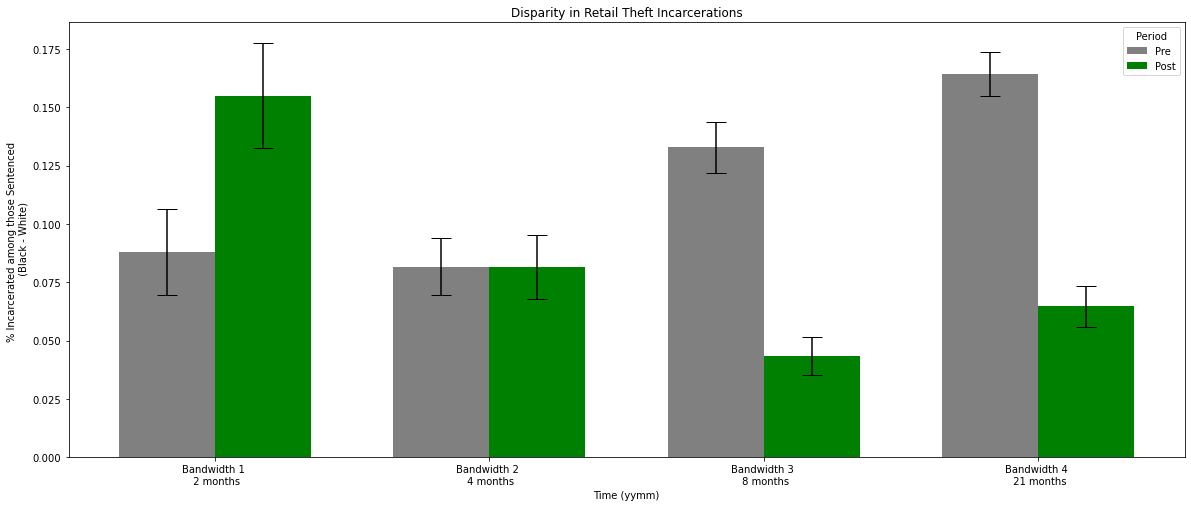

In [85]:
# SE Calculation:
# Recoding Total Cases to only include Black & White
result["total_cases"] = result["is_black"] + result["is_white"]
# Calculating SE:
result["se"] = ((result['Diff']*(1-result['Diff']))/result['total_cases'])**(0.5)


# Creating separate datasets for pre- & post-
pre_results = result[result["simplified_offense_derived"]=='Pre']
post_results = result[result["simplified_offense_derived"]=='Post']

# Creating plots

fig, ax = plt.subplots()
width = 0.35
labels = ['Bandwidth 1 \n 2 months', 'Bandwidth 2 \n 4 months', 'Bandwidth 3 \n 8 months', 'Bandwidth 4 \n 21 months']
x = np.arange(len(labels))  
width = 0.35  
rects1 = ax.bar(x - width/2, pre_results["Diff"], width, color = 'grey', label='Pre', yerr=pre_results[['se', 'se']].T.values, capsize=10 )
rects2 = ax.bar(x + width/2, post_results["Diff"], width, color = 'green', label='Post', yerr=[post_results["se"], post_results["se"].T.values], capsize=10)

ax.set_ylabel("% Incarcerated among those Sentenced \n (Black - White)")
ax.set_xlabel("Time (yymm)")
ax.set_title('Disparity in Retail Theft Incarcerations')
plt.xticks(np.arange(4), labels)
ax.legend(title = "Period")

plt.gcf().set_size_inches(20,8)
plt.show()


<FONT COLOR=Blue>
    
<b>Thoughts:</b> Based on the resulting graph, we can see that the disparity actually widened in the first two months after this change, remained the same in the four months after, and significantly narrowed in the 8 months or 21 months after. The data in the Bandwidth 1 would support the claim that this will widen disparities, but Bandwidth 3 and 4 support the claim that this will narrow disparities. 
    
   </FONT>

Writing a general a new user-defined function that:

- Has an argument(s) to indicate the levels of the `RACE` variable in the original data that will constitute two groups to compare: group 1 and group 2 (eg in one execution of the function, group 1 might be non-Hispanic white; group 2 might be Hispanic and Black; in another execution, group 1 might be Asian; group 2 but might be Hispanic. Note all levels need to be included in a group)
- Can be used to calculate the same bandwidth-specific disparities as above for defendants in those two groups
- Returns a table or plot with the results


In [86]:
# Define groups based on unique values already existing in columns 
def pre_post(group1, group2):
    
    #Initializing empty result dataset
    df_final = pd.DataFrame({'sentenceym_derived': pd.Series(dtype='object'),
                             'simplified_offense_derived': pd.Series(dtype='object'),
                             'total_cases': pd.Series(dtype='object'),
                             'is_g1': pd.Series(dtype='object'),
                             'is_g2': pd.Series(dtype='object'),
                             'g1_incarcerated': pd.Series(dtype='object'),
                            'g2_incarcerated': pd.Series(dtype='object')})
    
    
    # For data optimization and efficiency purposes, I'm filtering everything at the start since we only need 2015-2017
    # Creating raw data
    
    # Picking needed columns
    sentencingX = sentencing2[["CASE_ID", "sentenceym_derived", "simplified_offense_derived", "COMMITMENT_TYPE", "RACE"]]
    
    # Filtering on dates & offense
    sentencingX = sentencingX[sentencingX["sentenceym_derived"] >= '2015-11-01']
    sentencingX = sentencingX[sentencingX["sentenceym_derived"] <= '2017-12-01']
    sentencingX = sentencingX[sentencingX["simplified_offense_derived"] == "Retail Theft"]
    
    # Creating indicator columns for g1 & g2
    sentencingX["is_g1_derived"] = sentencingX["RACE"].str.contains(group1, case = False, na = False)
    sentencingX["is_g2_derived"] = sentencingX["RACE"].str.contains(group2, case = False, na = False)
    
    sentencingX["is_incarcerated_g1"] = (sentencingX["COMMITMENT_TYPE"]=="Illinois Department of Corrections") & (sentencingX["is_g1_derived"] == True)
    sentencingX["is_incarcerated_g2"] = (sentencingX["COMMITMENT_TYPE"]=="Illinois Department of Corrections") & (sentencingX["is_g2_derived"] == True)
    sentencingY = sentencingX.groupby(["sentenceym_derived", "simplified_offense_derived"]).agg(total_cases = ("CASE_ID", lambda x: len(pd.unique(x))),
                                                                         is_g1 = ("is_g1_derived", "sum"),
                                                                         is_g2 = ("is_g2_derived", "sum"),
                                                                          g1_incarcerated = ("is_incarcerated_g1", "sum"),
                                                                          g2_incarcerated = ("is_incarcerated_g2", "sum")).reset_index()
    
    # Date intervals for each bandwidth
    # Start date for all pres is Nov 2016 i.e. 2016-10-01 (Hardcoded)
    # Start date for all posts is Jan 2017 i.e. 2017-01-01 (Hardcoded)
    
    pre_end_dates = ('2016-09-11','2016-08-01','2016-04-01','2015-11-01')
    post_end_dates = ('2017-02-01','2017-04-01','2017-08-01','2017-12-01')
    
    # Creating loop that:
    # 1. Creates subsets from raw data of concerned bandwidth/months using given dates
    # 2. Sums all columns, according to bandwidths & transposes them into dataframe rows
    # 3. Gives them appropriate bandwidth names: at the moment, placed temporarily in sentenceym_derived
    # 4. Gives them appropriate pre/post tags: at the moment, placed temporarily in simplified_offense_derived
    # 5. Appends rows to df_final
    
    for i in range(4):
        
        df_pre = sentencingY[sentencingY["sentenceym_derived"] >= pre_end_dates[i]]
        df_pre = df_pre[df_pre["sentenceym_derived"] <= '2016-11-01']
        exp = pd.DataFrame(df_pre.sum()).transpose()
        exp.at[0,'sentenceym_derived'] = 'Bandwidth ' + str(i+1)
        exp.at[0,'simplified_offense_derived'] = 'Pre'

        df_post = sentencingY[sentencingY["sentenceym_derived"] >= '2017-01-01']
        df_post = df_post[df_post["sentenceym_derived"] <= post_end_dates[i]]
        exp2 = pd.DataFrame(df_post.sum()).transpose()
        exp2.at[0,'sentenceym_derived'] = 'Bandwidth ' + str(i+1)
        exp2.at[0,'simplified_offense_derived'] = 'Post'
        
        df_final = pd.concat([df_final, exp, exp2])
    
    
    res = pd.DataFrame(df_final)
    
    # Creating columns required
    res["Group1"] = res["g1_incarcerated"]/res["is_g1"]
    res["Group2"] = res["g2_incarcerated"]/res["is_g2"]
    res["Diff"] = (res["g1_incarcerated"]/res["is_g1"]) - (res["g2_incarcerated"]/res["is_g2"])
    
    
    # Renaming columns for * aesthetics * 
    res.rename(columns={'sentenceym_derived': 'Bandwidth', 'simplified_offense_derived': 'Pre_Post'}, inplace=True)
    res.rename(columns={'is_g1': 'is_' + group1, 'is_g2': 'is_' + group2}, inplace=True)
    res.rename(columns={'g1_incarcerated': group1 + "_incar", 'g2_incarcerated': group2+'_incar'}, inplace=True)
    res.rename(columns={'Group1': group1 + "_p_incar", 'Group2': group2+'_p_incar','Diff' : group1 + ' - ' + group2}, inplace=True)
    
    # Returning final result dataframe
    return(res)    
                                 
result = pre_post("asian", "hispanic")
result

,Bandwidth,Pre_Post,total_cases,is_asian,is_hispanic,asian_incar,hispanic_incar,asian_p_incar,hispanic_p_incar,asian - hispanic
0,Bandwidth 1,Pre,267,1,32,0,15,0.0,0.46875,-0.46875
0,Bandwidth 1,Post,285,4,25,2,8,0.5,0.32,0.18
0,Bandwidth 2,Pre,586,3,78,1,30,0.333333,0.384615,-0.051282
0,Bandwidth 2,Post,441,4,41,2,16,0.5,0.390244,0.109756
0,Bandwidth 3,Pre,1125,9,147,2,56,0.222222,0.380952,-0.15873
0,Bandwidth 3,Post,707,6,66,2,34,0.333333,0.515152,-0.181818
0,Bandwidth 4,Pre,1778,12,218,4,84,0.333333,0.385321,-0.051988
0,Bandwidth 4,Post,855,8,78,3,40,0.375,0.512821,-0.137821
